# Máquinas de Boltzmann Restringidas (Restricted Boltzmann machine)

* Las máquinas de boltzmann restringidas son un tipo de redes neuronales **generativas**.

* A diferencia de las redes neuronales que hemos visto (perceptron multicapa, redes recurrentes, redes convolucionales), las RBM's no solo reciben datos de entrada, la tarea de las RBM's es generar nuevos datos a partir de los datos que va adquiriendo.

* Las máquinas de boltzmann se tienen ese nombre en refrencia a la Distribución de probabilidad de Maxwell-Boltzmann, dicha distribución permite estudiar el comportamiento de los gases. 



* ¿Cómo son las máquinas de Boltzmann ?

Perceptron Multicapa

<center>
    <img src="http://mindwise-groningen.nl/wp-content/uploads/2016/08/visual-ANN.png" width = "40%">
</center>

Red Neuronal Convolucional

<center>
    <img src="https://www.researchgate.net/profile/Takio_Kurita/publication/320748406/figure/fig1/AS:555719381274624@1509505233044/An-example-of-CNN-architecture.png" width = "50%">
</center>

Red Neuronal Recurrente

<center>
    <img src="https://i.ytimg.com/vi/kMLl-TKaEnc/maxresdefault.jpg" width = "50%">
</center>

Máquinas de Boltzman

<center>
    <img src="https://www.researchgate.net/profile/Adriano_Barra/publication/322306628/figure/download/fig8/AS:668814790365200@1536469280561/Restricted-Boltzmann-machine-and-associative-Hopfield-network-Left-panel-example-of-a.ppm" width = "50%">
</center>

Máquinas de Boltzmann Restringidas

<center>
    <img src="http://andeekaplan.com/rbm/presentations/jsm2016/images/rbm.png" width = "50%">
</center>

* Las máquinas de Boltzmann son capaces a partir de datos de entrada encontrar patrones y correlaciones entre los datos con la finalidad de generar prediciones sobre los valores faltantes en la capa visible.

* En una máquina Boltzmann completa, cada nodo está conectado a todos los demás y por lo tanto, las conexiones crecen exponencialmente.


* ¿Cómo funcionan las máquinas de boltzmann?

Ejemplo: Estudiaremos el típico Sistema de recomendación de películas, utilizado en muchos servicios de televisión.

<center>
    <img src="https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/10/exmp-768x418.png" width = "50%">
</center>


El objetivo del sistema es el de hacer una recomendación a las personas que rankeo las películas que se muestran.

¿A la persona le gustará la película the Hobbit?

El objetivo de esta máquina de Boltzmann es reconstruir (o inferir) los nodos en los cuales el usuario no ha recolectado datos, en este caso, esta persona no ha visto la película the Hobbit. Una vez que a la RBM's se la han administrados todos los datos de los usuarios, inicia su proceso de entrenamiento, terminando su proceso de entrenamiento, podemos ahora consultar los datos reconstruidos.

<center>
    <img src="https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/10/exmp2-768x421.png" width = "50%">
</center>



In [1]:
!pip install wget

In [2]:
import wget
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import draw_neural_net as nn

# https://github.com/jzsmoreno/restricted_boltzmann.git
from restricted_boltzmann import RestrictedBoltzmann
from zipfile import ZipFile

In [3]:
url = "http://files.grouplens.org/datasets/movielens/ml-1m.zip"
filename = wget.download(url)

In [4]:
# Using linux
#!unzip ml-1m.zip

with ZipFile("ml-1m.zip", "r") as zObject:
    zObject.extractall()

movies_df = pd.read_csv(
    "ml-1m/movies.dat", sep="::", header=None, engine="python", encoding="latin_1"
)
movies_df.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# loading in the ratings dataset
ratings_df = pd.read_csv("ml-1m/ratings.dat", sep="::", header=None, engine="python")
ratings_df.head()

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
movies_df.columns = ["MovieID", "Title", "Genres"]
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings_df.columns = ["UserID", "MovieID", "Rating", "Timestamp"]
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
user_rating_df = ratings_df.pivot(index="UserID", columns="MovieID", values="Rating")
user_rating_df.head()  # 5 rows x 3706 columns
norm_user_rating_df = user_rating_df.fillna(0) / 5.0
trX = norm_user_rating_df.values
norm_user_rating_df.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
np.array(norm_user_rating_df).shape

(6040, 3706)

* Ecuaciones que gobiernan a las máquinas de Boltzmann

* Función de costo a optimizar:

\begin{equation}
L\left ( \theta, D\right) = \frac{1}{N}\sum_{x^{i}\in D}\log p\left( x^{i} \right)
\end{equation}

\begin{equation}
l\left( \theta, D \right) = -L\left(\theta, D\right)
\end{equation}

Donde la probabilidad de $x$

\begin{equation}
P\left( x\right) = \sum_{h}P\left(x, h\right) = \sum_{h}\frac{e^{-E\left(x, h\right)}}{Z}
\end{equation}

y $E(x,h)$

\begin{equation}
E\left( x, h \right) = -b'x-c'h-h'Wx
\end{equation}

Los gradientes están dados como:

\begin{equation}
-\frac{\partial \log p\left( x \right)}{\partial W_{ij}} = E_{x} \left[ p\left( h_{i}|x \right) \cdot x_{j} \right]-x^{i}_{j}\cdot \sigma\left( W_{i}\cdot x^{i}+c_{i} \right)
\end{equation}

\begin{equation}
-\frac{\partial \log p\left( x \right)}{\partial c_{i}} = E_{x}\left[ p\left( h_{i}|x \right) \right] - \sigma\left( W_{i}\cdot x^{i} \right)
\end{equation}

\begin{equation}
-\frac{\partial \log p\left( x \right)}{\partial b_{j}} = E_{x}\left[ p\left( x_{j}|h \right) \right] - x_{j}^{i}
\end{equation}




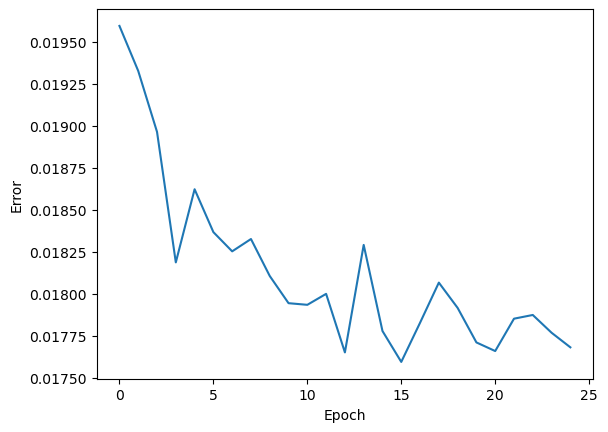

In [10]:
hiddenunits = 10
visibleunits = len(user_rating_df.columns)
alpha = 1

model = RestrictedBoltzmann()
model.train(trX, hiddenunits, visibleunits, alpha=1.0, epochs=25, batchsize=100, plot=True)

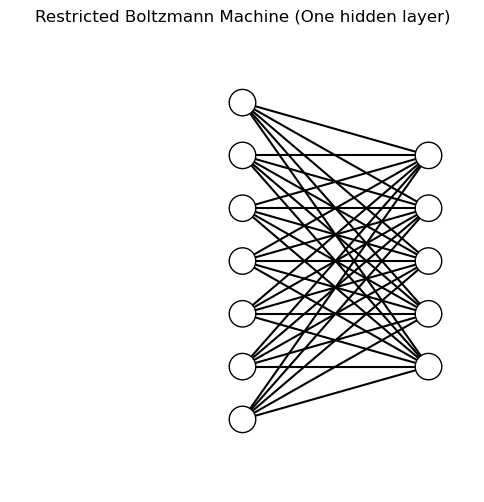

In [11]:
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.axis("off")
nn.draw_neural_net(ax, 0.5, 0.9, 0.1, 0.9, [7, 5])
plt.title("Restricted Boltzmann Machine (One hidden layer)")
fig.savefig("nn.png")

In [12]:
mock_user_id = 215
input_user = trX[mock_user_id - 1].reshape(1, -1)
input_user[0:5]
input_user = tf.cast(input_user, "float32")

In [13]:
input_user.shape

TensorShape([1, 3706])

In [14]:
output_user = model.v1(input_user).numpy()

In [15]:
output_user

array([[1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
np.max(output_user)

1.0

In [17]:
movies_recomendation = np.where(output_user[0, :] >= 0.5)[0]
print(movies_recomendation)

[   0  398  510  575  853 1113 1485 1584 1781 2078 2203 2214 3230 3394
 3617 3623]


In [18]:
output_user = model.predict(input_user)
output_user.shape

(1, 3706)

In [19]:
output_user[0:5]

array([[0.06237084, 0.00409236, 0.00640799, ..., 0.00094114, 0.00155909,
        0.00449268]], dtype=float32)

In [20]:
print(np.max(output_user))

0.28821447


In [21]:
movies_recomendation = np.where(output_user[0, :] >= 0.5)[0]
print(movies_recomendation)

[]
